In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np

# 读取文件

In [3]:
file_path = r'D:\MD_file\Corning\monthly_work\test\output_out.xyz'
frame_num = 0
# 是否存储
creat_new_frame = 0
# 分析元素
ana_element = ['Na']

In [4]:
# 读取文件
def get_data(path,frame_num):
    with open(path) as f:
        str_data = f.read()
    data = str_data.split()
    ###选帧#########
    #此处写个程序选帧
    atoms_num = int(data[0])
    frame_len = atoms_num*4+2
    data_len =len(data)
    max_frame = data_len // frame_len
    
    temp = []
    temp = data[frame_len*frame_num:frame_len*(frame_num+1)]
    #暂时先自行处理了表头
    temp = temp[2:]
    frame_list = []
    for i in range(atoms_num):
        frame_list.append([temp[i*4+0],float(temp[i*4+1]),float(temp[i*4+2]),float(temp[i*4+3])])
    
    return frame_list

In [5]:
data = get_data(file_path,frame_num)

In [6]:
f_list = []
for i in data:
    if (i[0] in ana_element):
        f_list.append([i[1],i[2],i[3]])

In [7]:
a,b,c = 0,0,0
for i in f_list:
    if(i[0]>a):
        a=i[0]
    if(i[1]>b):
        b=i[1]
    if(i[2]>c):
        c=i[2]
print(a,b,c)

25.750515 25.710015 25.35942


# 画图程序

In [9]:
def expend_data(x, y, z, smooth_degree=10):
    num_x = len(x)
    max_x = np.max(x)
    min_x = np.min(x)

    num_y = len(y)
    max_y = np.max(y)
    min_y = np.min(y)

    X, Y = np.meshgrid(x, y)
    coordinates = np.hstack((X.flatten()[:, None], Y.flatten()[:, None]))
    print(z.shape)

    m = np.linspace(min_x, max_x, (num_x - 1) * smooth_degree + 1)
    n = np.linspace(min_y, max_y, (num_y - 1) * smooth_degree + 1)
    M, N = np.meshgrid(m, n)

    U = griddata(coordinates, z, (M, N), method='cubic')

    return M, N, U

In [10]:
# 现在有了程序 然后分析把数据切割成xyz三个列表放入函数中

In [11]:
# 首先得到最大的xyz值
x_max = 0
y_max = 0
z_max = 0
for i in data:
    if(x_max<i[1]):
        x_max=i[1]
    if(y_max<i[2]):
        y_max=i[2]
    if(z_max<i[3]):
        z_max=i[3]
    #if (30<i[2]<50 and i[0]=='Ti'):
        #print(i)

# 切多少份
num_split = 25

In [12]:
print(x_max,y_max,z_max)

25.817615 25.802415 25.76412


In [13]:
x_list = np.linspace(0,x_max,num_split)
y_list = np.linspace(0,y_max,num_split)
# z应该是二维的 表示每个位置的强度
z_list = np.zeros((num_split,num_split))

# 然后为z列表赋值

In [15]:
# 写个函数 给出一个xyz，返回其在z中的xy位置
def get_xy(x,y,res):
    xn = x//res
    yn = y//res
    return (xn-1,yn-1)

In [16]:
# 遍历f原子的id，为其所在的组别分组
for i in f_list:
    (m,n) = get_xy(i[0],i[1],x_max/num_split)
    z_list[int(m),int(n)]+=1

In [17]:
z_list[6]

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 2., 0., 0., 1., 0.])

In [18]:
color_name = "YlOrRd"
axis_label = 'Num of atom'
x_label = 'X(Å)'
y_label = 'Y(Å)'

(625,)


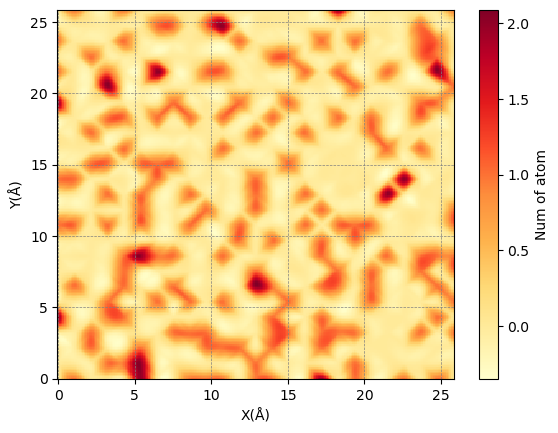

In [19]:
if __name__ == '__main__':
    x = x_list
    y = y_list
    z = z_list
   
    # 彩虹热力图
    M, N, U = expend_data(x, y, z.ravel(), smooth_degree=10)
    fig, ax = plt.subplots()
    # fig.figure(dpi=80,figsize=(6,8))
    c = ax.pcolormesh(M, N, U.T, cmap=color_name)
    fig.colorbar(c, ax=ax, label=axis_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # plt.ylim(10,70)
    # 添加网格线，设置间隔为1
    plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5, color='gray', alpha=1)
    #plt.xticks(np.arange(0, 80, 20))
    #plt.yticks(np.arange(0, 80.5, 20))
    plt.savefig('heatmap2.tif', dpi=60)
    # plt.title('Si + Al')
    plt.show()

In [20]:
ana_name = ''
for i in ana_element:
    ana_name += ' '+ i
print(ana_name)

 Na


# 图片保存地址

In [22]:
# 指定保存路径 图片
save_path = r'D:\备份20240918\桌面一般文件\桌面资料\04合作资料\1215\Na_dis.png'  # 可以指定其他格式如 '.pdf', '.jpg', '.png', 等等


(625,)
图像已保存到 D:\备份20240918\桌面一般文件\桌面资料\04合作资料\1215\Na_dis.png


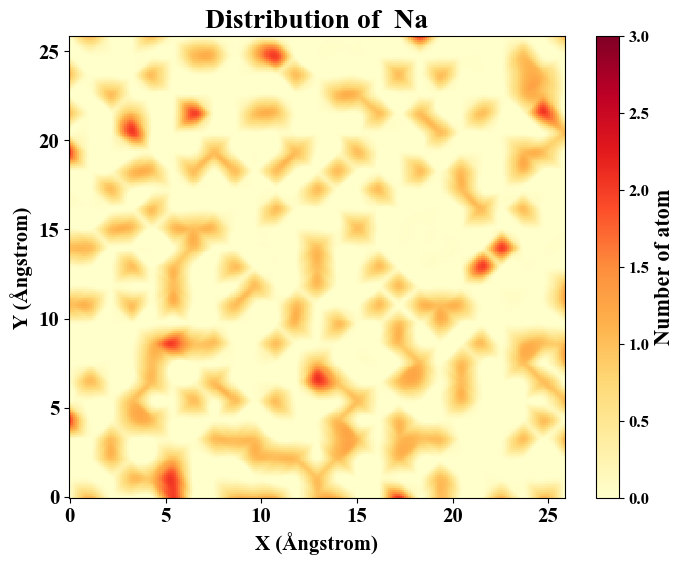

In [23]:

# 画图
x = x_list
y = y_list
z = z_list
M, N, U = expend_data(x, y, z.ravel(), smooth_degree=10)
#color_name = 'viridis'
axis_label = 'Number of atom'
x_label = 'X-axis'
y_label = 'Y-axis'

# 设置全局字体为新罗马字体
plt.rcParams['font.family'] = 'Times New Roman'
# 创建图形对象
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
plt.title(f'Distribution of {ana_name}',size = 20, weight='bold')
plt.xlabel('X (Ångstrom)',size = 15, weight='bold')
plt.ylabel('Y (Ångstrom)',size = 15, weight='bold')
#
plt.xticks(size = 15, weight='bold')
plt.yticks(size = 15, weight='bold')
# 绘制热力图
c = ax.pcolormesh(M, N, U.T, cmap='YlOrRd', vmin=0, vmax=3)  # 使用指定的颜色映射
cbar = fig.colorbar(c, ax=ax, label=axis_label)
# 设置colorbar的标签字体、字号和加粗
cbar.ax.yaxis.label.set_fontweight('bold')
cbar.ax.yaxis.label.set_fontsize(16)
# 设置colorbar刻度的字体大小
cbar.ax.tick_params(labelsize=12)  # 设置刻度标签字体大小
for tick in cbar.ax.get_yticklabels():
    tick.set_fontweight('bold')  # 设置刻度标签加粗

# 保存图形
plt.savefig(save_path)
print(f"图像已保存到 {save_path}")

(625,)


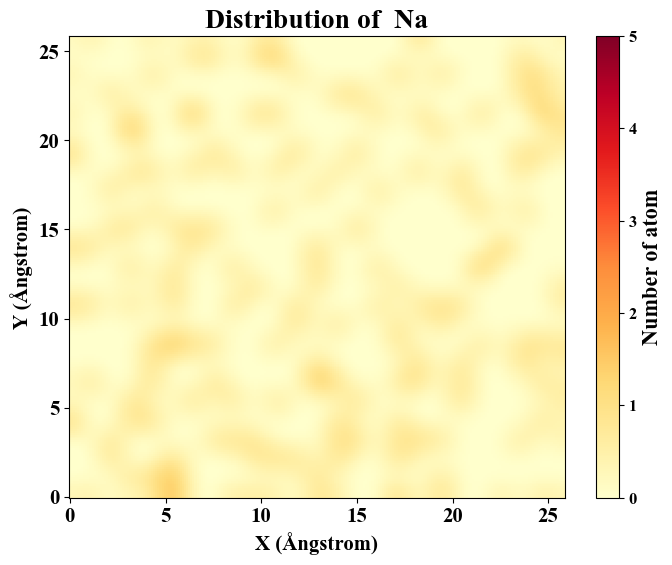

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# 画图
x = x_list
y = y_list
z = z_list

# 假设这个函数用于扩展数据并进行平滑处理
M, N, U = expend_data(x, y, z.ravel(), smooth_degree=10)

# 应用高斯平滑
U_smooth = gaussian_filter(U, sigma=6)  # sigma值可以调整以控制平滑程度

color_name = 'viridis'
axis_label = 'Number of atom'
x_label = 'X-axis'
y_label = 'Y-axis'

# 设置全局字体为新罗马字体
plt.rcParams['font.family'] = 'Times New Roman'
# 创建图形对象
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
plt.title(f'Distribution of {ana_name}', size=20, weight='bold')
plt.xlabel('X (Ångstrom)', size=15, weight='bold')
plt.ylabel('Y (Ångstrom)', size=15, weight='bold')

plt.xticks(size=15, weight='bold')
plt.yticks(size=15, weight='bold')

# 绘制热力图，设置colorbar范围
c = ax.pcolormesh(M, N, U_smooth.T, cmap='YlOrRd', vmin=0, vmax=5)  # 自定义范围
cbar = fig.colorbar(c, ax=ax, label=axis_label)

# 设置colorbar的标签字体、字号和加粗
cbar.ax.yaxis.label.set_fontweight('bold')
cbar.ax.yaxis.label.set_fontsize(16)
# cbar.ax.yaxis.label.set_color('blue')  # 设置colorbar标签颜色

# 设置colorbar刻度的字体大小
cbar.ax.tick_params(labelsize=12)  # 设置刻度标签字体大小
for tick in cbar.ax.get_yticklabels():
    tick.set_fontweight('bold')  # 设置刻度标签加粗
plt.show()


In [25]:
import numpy as np
import matplotlib.pyplot as plt
ana_element = ['Ti']

draw_data = []
for i in data:
    if i[0] in ana_element:
        draw_data.append(i)
elements  = draw_data


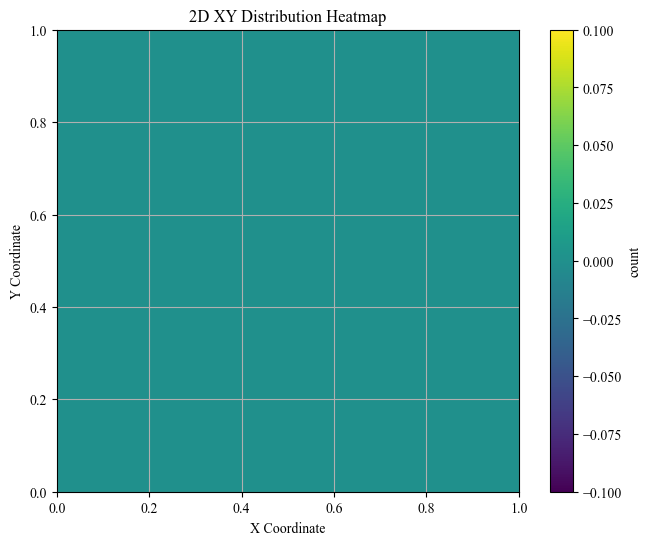

In [26]:

# 提取 X 和 Y 坐标
x = [item[1] for item in elements]  # X 坐标
y = [item[2] for item in elements]  # Y 坐标

# 创建二维数组
bin_size = 50
heatmap, xedges, yedges = np.histogram2d(x, y, bins=bin_size)

# 绘制连续热力图
plt.figure(figsize=(8, 6))
plt.imshow(heatmap.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='count')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D XY Distribution Heatmap')
plt.grid(True)
plt.show()


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 给定的元素列表
elements = draw_data

# 提取 X 和 Y 坐标
x = np.array([item[1] for item in elements])  # X 坐标
y = np.array([item[2] for item in elements])  # Y 坐标

# 计算 KDE
kde = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))

# 绘制连续热力图
plt.figure(figsize=(8, 6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='viridis')
plt.colorbar(label='density')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D XY Distribution Heatmap with KDE')
plt.grid(True)
plt.show()


ValueError: `dataset` input should have multiple elements.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def expend_data(x, y, z, smooth_degree=10):
    x_min, x_max = min(x), max(x)
    y_min, y_max = min(y), max(y)
    M, N = np.meshgrid(np.linspace(x_min, x_max, smooth_degree),
                       np.linspace(y_min, y_max, smooth_degree))
    U = griddata((x, y), z, (M, N), method='linear')
    return M, N, U

# 给定的元素列表
elements = [['Ti', 33.113659, 38.313611, 6.52948],
            ['Ti', 44.746559, 37.205311, 4.79382],
            ['Ti', 37.061659, 47.729211, 6.60175]]

# 提取 X、Y、Z 坐标
x = np.array([item[1] for item in elements])  # X 坐标
y = np.array([item[2] for item in elements])  # Y 坐标
z = np.array([item[3] for item in elements])  # Z 坐标

# 扩展数据
M, N, U = expend_data(x, y, z, smooth_degree=10)

# 绘制彩虹热力图
fig, ax = plt.subplots()
c = ax.pcolormesh(M, N, U.T, cmap='rainbow')
fig.colorbar(c, ax=ax, label='value')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D XY Distribution Heatmap with Continuous Rainbow Color Transition')
plt.grid(True)
plt.show()
